Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 2019/2020  
http://www.fer.unizg.hr/predmet/su

------------------------------

### Laboratorijska vježba 1: Regresija

*Verzija: 1.2  
Zadnji put ažurirano: 27. rujna 2019.*

(c) 2015-2019 Jan Šnajder, Domagoj Alagić 

Objavljeno: **30. rujna 2019.**  
Rok za predaju: **21. listopada 2019. u 07:00h**

------------------------------

### Upute

Prva laboratorijska vježba sastoji se od deset zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [1]:
# Učitaj osnovne biblioteke...
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Zadatci

### 1. Jednostavna regresija

Zadan je skup primjera $\mathcal{D}=\{(x^{(i)},y^{(i)})\}_{i=1}^4 = \{(0,4),(1,1),(2,2),(4,5)\}$. Primjere predstavite matricom $\mathbf{X}$ dimenzija $N\times n$ (u ovom slučaju $4\times 1$) i vektorom oznaka $\textbf{y}$, dimenzija $N\times 1$ (u ovom slučaju $4\times 1$), na sljedeći način:


In [2]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

### (a)

Proučite funkciju [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) iz biblioteke `sklearn` i upotrijebite je za generiranje matrice dizajna $\mathbf{\Phi}$ koja ne koristi preslikavanje u prostor više dimenzije (samo će svakom primjeru biti dodane *dummy* jedinice; $m=n+1$).


In [3]:
from sklearn.preprocessing import PolynomialFeatures

In [4]:
# Vaš kôd ovdje
poly = PolynomialFeatures(1)
features = poly.fit_transform(X)
features

array([[1., 0.],
       [1., 1.],
       [1., 2.],
       [1., 4.]])

### (b)

Upoznajte se s modulom [`linalg`](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html). Izračunajte težine $\mathbf{w}$ modela linearne regresije kao $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Zatim se uvjerite da isti rezultat možete dobiti izračunom pseudoinverza $\mathbf{\Phi}^+$ matrice dizajna, tj. $\mathbf{w}=\mathbf{\Phi}^+\mathbf{y}$, korištenjem funkcije [`pinv`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html).

In [5]:
from numpy import linalg

In [6]:
# Vaš kôd ovdje
w = linalg.inv(features.T.dot(features)).dot(features.T).dot(y)
wp = linalg.pinv(features).dot(y)
w, wp

(array([2.2       , 0.45714286]), array([2.2       , 0.45714286]))

Radi jasnoće, u nastavku je vektor $\mathbf{x}$ s dodanom *dummy* jedinicom $x_0=1$ označen kao $\tilde{\mathbf{x}}$.

### (c)

Prikažite primjere iz $\mathcal{D}$ i funkciju $h(\tilde{\mathbf{x}})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$. Izračunajte pogrešku učenja prema izrazu $E(h|\mathcal{D})=\frac{1}{2}\sum_{i=1}^N(\tilde{\mathbf{y}}^{(i)} - h(\tilde{\mathbf{x}}))^2$. Možete koristiti funkciju srednje kvadratne pogreške [`mean_squared_error`]( http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) iz modula [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

**Q:** Gore definirana funkcija pogreške $E(h|\mathcal{D})$ i funkcija srednje kvadratne pogreške nisu posve identične. U čemu je razlika? Koja je "realnija"?

2.0428571428571427

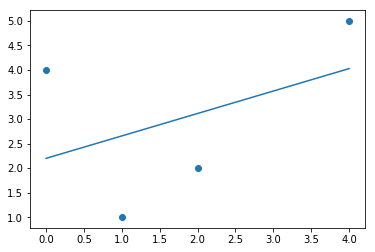

In [7]:
# Vaš kôd ovdje
plt.scatter(X, y)
plt.plot(X, features.dot(w))
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y, features.dot(w))
mse


### (d)

Uvjerite se da za primjere iz $\mathcal{D}$ težine $\mathbf{w}$ ne možemo naći rješavanjem sustava $\mathbf{w}=\mathbf{\Phi}^{-1}\mathbf{y}$, već da nam doista treba pseudoinverz.

**Q:** Zašto je to slučaj? Bi li se problem mogao riješiti preslikavanjem primjera u višu dimenziju? Ako da, bi li to uvijek funkcioniralo, neovisno o skupu primjera $\mathcal{D}$? Pokažite na primjeru.

In [8]:
# Vaš kôd ovdje
print(features)
poly3 = PolynomialFeatures(3)
features_higher_dim = poly3.fit_transform(X)
print(features_higher_dim)
w_inv = linalg.inv(features_higher_dim).dot(y)
w_inv

[[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 4.]]
[[ 1.  0.  0.  0.]
 [ 1.  1.  1.  1.]
 [ 1.  2.  4.  8.]
 [ 1.  4. 16. 64.]]


array([ 4.        , -5.91666667,  3.375     , -0.45833333])

### (e) 

Proučite klasu [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Uvjerite se da su težine koje izračunava ta funkcija (dostupne pomoću atributa `coef_` i `intercept_`) jednake onima koje ste izračunali gore. Izračunajte predikcije modela (metoda `predict`) i uvjerite se da je pogreška učenja identična onoj koju ste ranije izračunali.

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
# Vaš kôd ovdje
reg = LinearRegression().fit(X, y)
print(reg.coef_)
print(reg.intercept_)
print(X)
print(y)
prediction = reg.predict(X)
print(prediction)
mse_predict = mean_squared_error(y, prediction)
print(mse_predict)

[0.45714286]
2.2
[[0]
 [1]
 [2]
 [4]]
[4 1 2 5]
[2.2        2.65714286 3.11428571 4.02857143]
2.042857142857143


### 2. Polinomijalna regresija i utjecaj šuma

### (a)

Razmotrimo sada regresiju na većem broju primjera. Definirajte funkciju `make_labels(X, f, noise=0)` koja uzima matricu neoznačenih primjera $\mathbf{X}_{N\times n}$ te generira vektor njihovih oznaka $\mathbf{y}_{N\times 1}$. Oznake se generiraju kao $y^{(i)} = f(x^{(i)})+\mathcal{N}(0,\sigma^2)$, gdje je $f:\mathbb{R}^n\to\mathbb{R}$ stvarna funkcija koja je generirala podatke (koja nam je u stvarnosti nepoznata), a $\sigma$ je standardna devijacija Gaussovog šuma, definirana parametrom `noise`. Za generiranje šuma možete koristiti funkciju [`numpy.random.normal`](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.normal.html). 

Generirajte skup za učenje od $N=50$ primjera uniformno distribuiranih u intervalu $[-5,5]$ pomoću funkcije $f(x) = 5 + x -2 x^2 -5 x^3$ uz šum  $\sigma=200$:

In [13]:
from numpy.random import normal

def make_labels(X, f, noise=0) :
    # Vaš kôd ovdje
    return f(X) + normal(scale=noise, size=X.shape)

def fun(x):
    return 5 + x - 2*x**2 - 5*x**3

training_set = make_instances(-5, 5, 50)
training_labels = make_labels(training_set, fun, noise=200)
print(training_set)
print(training_labels)

[[-5.        ]
 [-4.79591837]
 [-4.59183673]
 [-4.3877551 ]
 [-4.18367347]
 [-3.97959184]
 [-3.7755102 ]
 [-3.57142857]
 [-3.36734694]
 [-3.16326531]
 [-2.95918367]
 [-2.75510204]
 [-2.55102041]
 [-2.34693878]
 [-2.14285714]
 [-1.93877551]
 [-1.73469388]
 [-1.53061224]
 [-1.32653061]
 [-1.12244898]
 [-0.91836735]
 [-0.71428571]
 [-0.51020408]
 [-0.30612245]
 [-0.10204082]
 [ 0.10204082]
 [ 0.30612245]
 [ 0.51020408]
 [ 0.71428571]
 [ 0.91836735]
 [ 1.12244898]
 [ 1.32653061]
 [ 1.53061224]
 [ 1.73469388]
 [ 1.93877551]
 [ 2.14285714]
 [ 2.34693878]
 [ 2.55102041]
 [ 2.75510204]
 [ 2.95918367]
 [ 3.16326531]
 [ 3.36734694]
 [ 3.57142857]
 [ 3.7755102 ]
 [ 3.97959184]
 [ 4.18367347]
 [ 4.3877551 ]
 [ 4.59183673]
 [ 4.79591837]
 [ 5.        ]]
[[ 649.30331992]
 [ 477.05487857]
 [ 391.95501928]
 [ 692.35106184]
 [ 665.71006321]
 [ 366.46686435]
 [  14.50360635]
 [ 389.26221883]
 [ 310.76445063]
 [  74.96350973]
 [-153.35142519]
 [ 126.03642472]
 [-219.41071657]
 [ 469.16190018]
 [-311.9690

In [14]:
def make_instances(x1, x2, N) :
    return np.array([np.array([x]) for x in np.linspace(x1,x2,N)])

Prikažite taj skup funkcijom [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter).

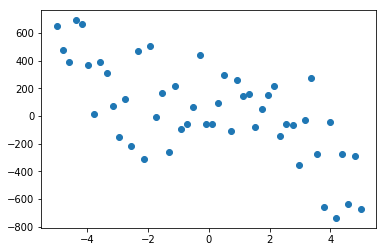

In [15]:
# Vaš kôd ovdje
plt.scatter(training_set, training_labels)

### (b)

Trenirajte model polinomijalne regresije stupnja $d=3$. Na istom grafikonu prikažite naučeni model $h(\mathbf{x})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$ i primjere za učenje. Izračunajte pogrešku učenja modela.

46667.511492243495


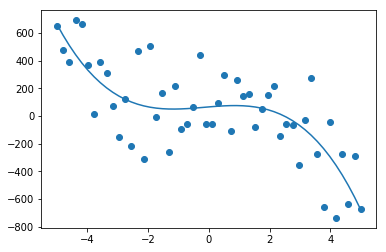

In [16]:
# Vaš kôd ovdje
poly = PolynomialFeatures(3)
features = poly.fit_transform(training_set)

model = LinearRegression()
model.fit(features, training_labels)
h = model.predict(features)
mse = mean_squared_error(training_labels, h)
print(mse)
plt.scatter(training_set, training_labels)
plt.plot(training_set, h)

### 3. Odabir modela

### (a)

Na skupu podataka iz zadatka 2 trenirajte pet modela linearne regresije $\mathcal{H}_d$ različite složenosti, gdje je $d$ stupanj polinoma, $d\in\{1,3,5,10,20\}$. Prikažite na istome grafikonu skup za učenje i funkcije $h_d(\mathbf{x})$ za svih pet modela (preporučujemo koristiti `plot` unutar `for` petlje). Izračunajte pogrešku učenja svakog od modela.

**Q:** Koji model ima najmanju pogrešku učenja i zašto?

62081.5974029172 46667.511492243495 45465.41126498178 44819.78543709208 35117.83016308072


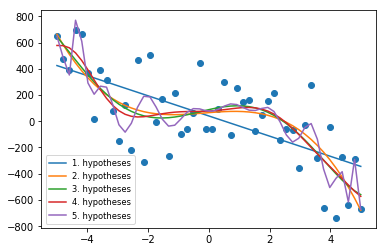

In [17]:
# Vaš kôd ovdje
poly1 = PolynomialFeatures(1)
feat1 = poly1.fit_transform(training_set)
model1 = LinearRegression()
model1.fit(feat1, training_labels)
h1 = model1.predict(feat1)
mse1 = mean_squared_error(training_labels, h1)

poly3 = PolynomialFeatures(3)
feat3 = poly3.fit_transform(training_set)
model3 = LinearRegression()
model3.fit(feat3, training_labels)
h3 = model3.predict(feat3)
mse3 = mean_squared_error(training_labels, h3)

poly5 = PolynomialFeatures(5)
feat5 = poly5.fit_transform(training_set)
model5 = LinearRegression()
model5.fit(feat5, training_labels)
h5 = model5.predict(feat5)
mse5 = mean_squared_error(training_labels, h5)

poly10 = PolynomialFeatures(10)
feat10 = poly10.fit_transform(training_set)
model10 = LinearRegression()
model10.fit(feat10, training_labels)
h10 = model10.predict(feat10)
mse10 = mean_squared_error(training_labels, h10)

poly20 = PolynomialFeatures(20)
feat20 = poly20.fit_transform(training_set)
model20 = LinearRegression()
model20.fit(feat20, training_labels)
h20 = model20.predict(feat20)
mse20 = mean_squared_error(training_labels, h20)

print(mse1, mse3, mse5, mse10, mse20)

hypotheses = (h1, h3, h5, h10, h20)
plt.scatter(training_set, training_labels)
for i, h in enumerate(hypotheses):
    plt.plot(training_set, h, label='{0}. hypotheses'.format(i+1))
plt.legend(loc='lower left', fontsize="small")

### (b)

Razdvojite skup primjera iz zadatka 2 pomoću funkcije [`model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) na skup za učenja i skup za ispitivanje u omjeru 1:1. Prikažite na jednom grafikonu pogrešku učenja i ispitnu pogrešku za modele polinomijalne regresije $\mathcal{H}_d$, sa stupnjem polinoma $d$ u rasponu $d\in [1,2,\ldots,20]$. Budući da kvadratna pogreška brzo raste za veće stupnjeve polinoma, umjesto da iscrtate izravno iznose pogrešaka, iscrtajte njihove logaritme.

**NB:** Podjela na skupa za učenje i skup za ispitivanje mora za svih pet modela biti identična.

**Q:** Je li rezultat u skladu s očekivanjima? Koji biste model odabrali i zašto?

**Q:** Pokrenite iscrtavanje više puta. U čemu je problem? Bi li problem bio jednako izražen kad bismo imali više primjera? Zašto?

In [18]:
from sklearn.model_selection import train_test_split

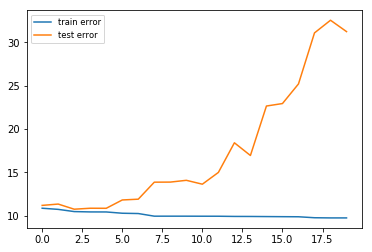

In [19]:
# Vaš kôd ovdje
X_train, X_test = train_test_split(training_set, test_size=0.5)
y_train, y_test = make_labels(X_train, fun, noise=200), make_labels(X_test, fun, noise=200)

training_errors, test_errors = np.zeros(20), np.zeros(20)

for i in range(20):
    poly_i = PolynomialFeatures(i+1)
    feat_train = poly_i.fit_transform(X_train)
    feat_test = poly_i.fit_transform(X_test)
    
    model = LinearRegression()
    model.fit(feat_train, y_train)
    h_train = model.predict(feat_train)
    training_errors[i] = np.log(mean_squared_error(y_train, h_train))
    
    h_test = model.predict(feat_test)
    test_errors[i] = np.log(mean_squared_error(y_test, h_test))

plt.plot(range(20), training_errors, label="train error")
plt.plot(range(20), test_errors, label="test error")
plt.legend(loc="best", fontsize="small")

### (c)

Točnost modela ovisi o (1) njegovoj složenosti (stupanj $d$ polinoma), (2) broju primjera $N$, i (3) količini šuma. Kako biste to analizirali, nacrtajte grafikone pogrešaka kao u 3b, ali za različit $N\in$ (trećina, dvije trećine, sve) i količine šuma $\sigma\in\{100,200,500\}$ (ukupno 9 grafikona). Upotrijebite funkciju [`subplots`](http://matplotlib.org/examples/pylab_examples/subplots_demo.html) kako biste pregledno posložili grafikone u tablicu $3\times 3$. Podatci se generiraju na isti način kao u zadatku 2.

**NB:** Pobrinite se da svi grafikoni budu generirani nad usporedivim skupovima podataka, na sljedeći način. Generirajte najprije svih 1000 primjera, podijelite ih na skupove za učenje i skupove za ispitivanje (dva skupa od po 500 primjera). Zatim i od skupa za učenje i od skupa za ispitivanje načinite tri različite verzije, svaka s drugačijom količinom šuma (ukupno 2x3=6 verzija podataka). Kako bi simulirali veličinu skupa podataka, od tih dobivenih 6 skupova podataka uzorkujte trećinu, dvije trećine i sve podatke. Time ste dobili 18 skupova podataka -- skup za učenje i za testiranje za svaki od devet grafova.

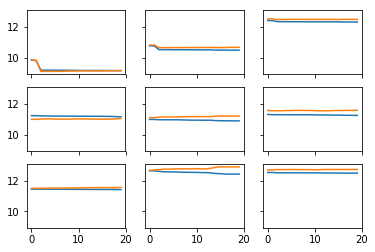

In [20]:
# Vaš kôd ovdje
X = make_instances(-5, 5, 1000)
X_train, X_test = train_test_split(X, test_size=0.5)

y_train_100 = make_labels(X_train, fun, noise=100)
y_train_200 = make_labels(X_train, fun, noise=200)
y_train_500 = make_labels(X_train, fun, noise=500)
y_test_100 = make_labels(X_test, fun, noise=100)
y_test_200 = make_labels(X_test, fun, noise=200)
y_test_500 = make_labels(X_test, fun, noise=500)

training_dataset = [y_train_100, y_train_200, y_train_500]
testing_dataset = [y_test_100, y_test_200, y_test_500]

X_train_third, X_train_two_thirds = train_test_split(X_train, test_size=2/3)
X_test_third, X_test_two_thirds = train_test_split(X_test, test_size=2/3)

for y_tr in [y_train_100, y_train_200, y_train_500]:
    y_tr_third, y_tr_two_thirds = train_test_split(y_tr, test_size=2/3)
    training_dataset.extend([y_tr_third, y_tr_two_thirds])

for y_tst in [y_test_100, y_test_200, y_test_500]:
    y_tst_third, y_tst_two_thirds = train_test_split(y_tst, test_size=2/3)
    testing_dataset.extend([y_tst_third, y_tst_two_thirds])

fig, subplot = plt.subplots(3, 3, sharex=True, sharey=True)
training_errors = np.zeros(20)
testing_errors = np.zeros(20)

def find_X(index):
    if index < 3:
        return X_train, X_test
    elif index % 2 == 1:
        return X_train_third, X_test_third
    else:
        return X_train_two_thirds, X_test_two_thirds
    
for index, (y_tr, y_tst) in enumerate(zip(training_dataset, testing_dataset)):
    for i in range(20):
        X_tr, X_tst = find_X(index)
        poly = PolynomialFeatures(i+1)
        feat_tr = poly.fit_transform(X_tr)
        feat_tst = poly.fit_transform(X_tst)
        
        model = LinearRegression()
        model.fit(feat_tr, y_tr)
        h_tr = model.predict(feat_tr)
        training_errors[i] = np.log(mean_squared_error(y_tr, h_tr))
        
        h_tst = model.predict(feat_tst)
        testing_errors[i] = np.log(mean_squared_error(y_tst, h_tst))
    
    subplot[index//3, index%3].plot(range(20), training_errors, label="Train")
    subplot[index//3, index%3].plot(range(20), testing_errors, label="Test")



***Q:*** Jesu li rezultati očekivani? Obrazložite.

### 4. Regularizirana regresija

### (a)

U gornjim eksperimentima nismo koristili **regularizaciju**. Vratimo se najprije na primjer iz zadatka 1. Na primjerima iz tog zadatka izračunajte težine $\mathbf{w}$ za polinomijalni regresijski model stupnja $d=3$ uz L2-regularizaciju (tzv. *ridge regression*), prema izrazu $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Napravite izračun težina za regularizacijske faktore $\lambda=0$, $\lambda=1$ i $\lambda=10$ te usporedite dobivene težine.

**Q:** Kojih je dimenzija matrica koju treba invertirati?

**Q:** Po čemu se razlikuju dobivene težine i je li ta razlika očekivana? Obrazložite.

In [21]:
# Vaš kôd ovdje
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])
lambda_0 = 0
lambda_1 = 1
lambda_10 = 10
poly = PolynomialFeatures(3)
features = poly.fit_transform(X)
print(features.shape)
print(features.T.dot(features).shape)

eye_mat = np.eye(features.shape[0])
eye_mat[0][0] = 0
print(eye_mat)

w_l_0 = linalg.inv(features.T.dot(features) + lambda_0 * eye_mat).dot(features.T).dot(y)
w_l_1 = linalg.inv(features.T.dot(features) + lambda_1 * eye_mat).dot(features.T).dot(y)
w_l_10 = linalg.inv(features.T.dot(features) + lambda_10 * eye_mat).dot(features.T).dot(y)
print(w_l_0, w_l_1, w_l_10)

(4, 4)
(4, 4)
[[0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
[ 4.         -5.91666667  3.375      -0.45833333] [ 3.05696145 -0.69079365 -0.2831746   0.1445805 ] [ 2.49444184 -0.15897295 -0.13423067  0.0815601 ]


### (b)

Proučite klasu [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model), koja implementira L2-regularizirani regresijski model. Parametar $\alpha$ odgovara parametru $\lambda$. Primijenite model na istim primjerima kao u prethodnom zadatku i ispišite težine $\mathbf{w}$ (atributi `coef_` i `intercept_`).

**Q:** Jesu li težine identične onima iz zadatka 4a? Ako nisu, objasnite zašto je to tako i kako biste to popravili.

In [22]:
from sklearn.linear_model import Ridge

In [23]:
# Vaš kôd ovdje
model_0 = Ridge(alpha=0.0)
model_1 = Ridge(alpha=1.0)
model_10 = Ridge(alpha=10.0)

model_0.fit(features, y)
print(model_0.intercept_, model_0.coef_)

model_1.fit(features, y)
print(model_1.intercept_, model_1.coef_)

model_10.fit(features, y)
print(model_10.intercept_, model_10.coef_)

4.000000000000025 [ 0.         -5.91666667  3.375      -0.45833333]
3.0569614512471652 [ 0.         -0.69079365 -0.2831746   0.1445805 ]
2.4944418431229733 [ 0.         -0.15897295 -0.13423067  0.0815601 ]


### 5. Regularizirana polinomijalna regresija

### (a)

Vratimo se na slučaj $N=50$ slučajno generiranih primjera iz zadatka 2. Trenirajte modele polinomijalne regresije $\mathcal{H}_{\lambda,d}$ za $\lambda\in\{0,100\}$ i $d\in\{2,10\}$ (ukupno četiri modela). Skicirajte pripadne funkcije $h(\mathbf{x})$ i primjere (na jednom grafikonu; preporučujemo koristiti `plot` unutar `for` petlje).

**Q:** Jesu li rezultati očekivani? Obrazložite.

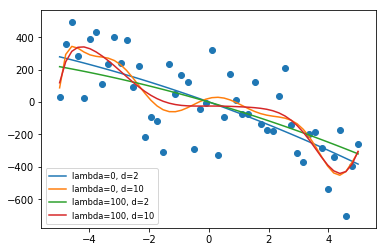

In [24]:
# Vaš kôd ovdje
training_set = make_instances(-5, 5, 50)
training_labels = make_labels(training_set, fun, noise=200)

for lam in (0, 100):
    for d in (2, 10):
        poly = PolynomialFeatures(d)
        feat = poly.fit_transform(training_set)
        
        model = Ridge(alpha=lam)
        model.fit(feat, training_labels)
        h = model.predict(feat)
        plt.plot(training_set, h, label="lambda={0}, d={1}".format(lam, d))
plt.scatter(training_set, training_labels)
plt.legend(loc="best", fontsize="small")

### (b)

Kao u zadataku 3b, razdvojite primjere na skup za učenje i skup za ispitivanje u omjeru 1:1. Prikažite krivulje logaritama pogreške učenja i ispitne pogreške u ovisnosti za model $\mathcal{H}_{d=10,\lambda}$, podešavajući faktor regularizacije $\lambda$ u rasponu $\lambda\in\{0,1,\dots,50\}$.

**Q:** Kojoj strani na grafikonu odgovara područje prenaučenosti, a kojoj podnaučenosti? Zašto?

**Q:** Koju biste vrijednosti za $\lambda$ izabrali na temelju ovih grafikona i zašto?


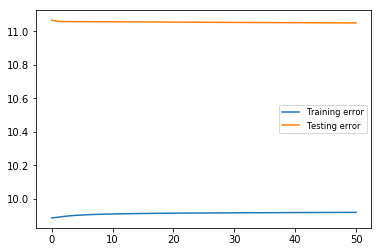

In [25]:
# Vaš kôd ovdje
from sklearn.model_selection import train_test_split

X = make_instances(-5, 5, 50)
X_train, X_test = train_test_split(X, test_size=0.5)
y_train, y_test = make_labels(X_train, fun, noise=200), make_labels(X_test, fun, noise=200)

lambdas = range(51)
training_errors = np.zeros(51)
testing_errors = np.zeros(51)

poly = PolynomialFeatures(10)
feat_tr = poly.fit_transform(X_train)
feat_tst = poly.fit_transform(X_test)

for lam in lambdas:
    model = Ridge(alpha=lam)
    model.fit(feat_tr, y_train)
    h_tr = model.predict(feat_tr)
    training_errors[lam] = np.log(mean_squared_error(y_train, h_tr))
    
    h_tst = model.predict(feat_tst)
    testing_errors[lam] = np.log(mean_squared_error(y_test, h_tst))

plt.plot(lambdas, training_errors, label="Training error")
plt.plot(lambdas, testing_errors, label="Testing error")
plt.legend(loc="best", fontsize="small")

### 6. L1-regularizacija i L2-regularizacija

Svrha regularizacije jest potiskivanje težina modela $\mathbf{w}$ prema nuli, kako bi model bio što jednostavniji. Složenost modela može se okarakterizirati normom pripadnog vektora težina $\mathbf{w}$, i to tipično L2-normom ili L1-normom. Za jednom trenirani model možemo izračunati i broj ne-nul značajki, ili L0-normu, pomoću sljedeće funkcije koja prima vektor težina $\mathbf{w}$:

In [26]:
def nonzeroes(coef, tol=1e-6): 
    return len(coef) - len(coef[np.isclose(0, coef, atol=tol)])

### (a)

Za ovaj zadatak upotrijebite skup za učenje i skup za testiranje iz zadatka 3b. Trenirajte modele **L2-regularizirane** polinomijalne regresije stupnja $d=10$, mijenjajući hiperparametar $\lambda$ u rasponu $\{1,2,\dots,100\}$. Za svaki od treniranih modela izračunajte L{0,1,2}-norme vektora težina $\mathbf{w}$ te ih prikažite kao funkciju od $\lambda$. Pripazite što točno šaljete u funkciju za izračun normi.

**Q:** Objasnite oblik obiju krivulja. Hoće li krivulja za $\|\mathbf{w}\|_2$ doseći nulu? Zašto? Je li to problem? Zašto?

**Q:** Za $\lambda=100$, koliki je postotak težina modela jednak nuli, odnosno koliko je model rijedak?

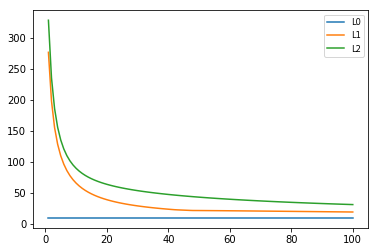

In [27]:
# Vaš kôd ovdje
X = make_instances(-5, 5, 50)
X_train, X_test = train_test_split(X, test_size=0.5)
y_train, y_test = make_labels(X_train, fun, noise=200), make_labels(X_test, fun, noise=200)

poly = PolynomialFeatures(10)
feat_train = poly.fit_transform(X_train)
feat_test = poly.fit_transform(X_test)

L0_norm = np.zeros(100)
L1_norm = np.zeros(100)
L2_norm = np.zeros(100)

for lam in range(1, 101):
    model = Ridge(alpha=lam)
    model.fit(feat_train, y_train)
    
    L0_norm[lam-1] = nonzeroes(model.coef_.flatten())
    L1_norm[lam-1] = linalg.norm(model.coef_, 1)
    L2_norm[lam-1] = linalg.norm(model.coef_, 2)

plt.plot(range(1, 101), L0_norm, label="L0")
plt.plot(range(1, 101), L1_norm, label="L1")
plt.plot(range(1, 101), L2_norm, label="L2")
plt.legend(loc="best", fontsize="small")
plt.show()

### (b)

Glavna prednost L1-regularizirane regresije (ili *LASSO regression*) nad L2-regulariziranom regresijom jest u tome što L1-regularizirana regresija rezultira **rijetkim modelima** (engl. *sparse models*), odnosno modelima kod kojih su mnoge težine pritegnute na nulu. Pokažite da je to doista tako, ponovivši gornji eksperiment s **L1-regulariziranom** regresijom, implementiranom u klasi  [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) u modulu [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Zanemarite upozorenja.

C:\Users\Toma\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Toma\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Toma\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Toma\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase t

C:\Users\Toma\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Toma\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Toma\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Toma\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase t

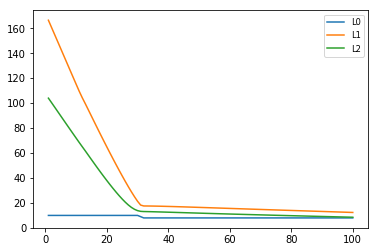

In [28]:
# Vaš kôd ovdje
from sklearn.linear_model import Lasso

X = make_instances(-5, 5, 50)
X_train, X_test = train_test_split(X, test_size=0.5)
y_train, y_test = make_labels(X_train, fun, noise=200), make_labels(X_test, fun, noise=200)

poly = PolynomialFeatures(10)
feat_train = poly.fit_transform(X_train)
feat_test = poly.fit_transform(X_test)

L0_norm = np.zeros(100)
L1_norm = np.zeros(100)
L2_norm = np.zeros(100)

for lam in range(1, 101):
    model = Lasso(alpha=lam)
    model.fit(feat_train, y_train)
    
    L0_norm[lam-1] = nonzeroes(model.coef_.flatten())
    L1_norm[lam-1] = linalg.norm(model.coef_, 1)
    L2_norm[lam-1] = linalg.norm(model.coef_, 2)

plt.plot(range(1, 101), L0_norm, label="L0")
plt.plot(range(1, 101), L1_norm, label="L1")
plt.plot(range(1, 101), L2_norm, label="L2")
plt.legend(loc="best", fontsize="small")
plt.show()

### 7. Značajke različitih skala

Često se u praksi možemo susreti sa podatcima u kojima sve značajke nisu jednakih magnituda. Primjer jednog takvog skupa je regresijski skup podataka `grades` u kojem se predviđa prosjek ocjena studenta na studiju (1--5) na temelju dvije značajke: bodova na prijamnom ispitu (1--3000) i prosjeka ocjena u srednjoj školi. Prosjek ocjena na studiju izračunat je kao težinska suma ove dvije značajke uz dodani šum.

Koristite sljedeći kôd kako biste generirali ovaj skup podataka.

In [29]:
n_data_points = 500
np.random.seed(69)

# Generiraj podatke o bodovima na prijamnom ispitu koristeći normalnu razdiobu i ograniči ih na interval [1, 3000].
exam_score = np.random.normal(loc=1500.0, scale = 500.0, size = n_data_points) 
exam_score = np.round(exam_score)
exam_score[exam_score > 3000] = 3000
exam_score[exam_score < 0] = 0

# Generiraj podatke o ocjenama iz srednje škole koristeći normalnu razdiobu i ograniči ih na interval [1, 5].
grade_in_highschool = np.random.normal(loc=3, scale = 2.0, size = n_data_points)
grade_in_highschool[grade_in_highschool > 5] = 5
grade_in_highschool[grade_in_highschool < 1] = 1

# Matrica dizajna.
grades_X = np.array([exam_score,grade_in_highschool]).T

# Završno, generiraj izlazne vrijednosti.
rand_noise = np.random.normal(loc=0.0, scale = 0.5, size = n_data_points)
exam_influence = 0.9
grades_y = ((exam_score / 3000.0) * (exam_influence) + (grade_in_highschool / 5.0) \
            * (1.0 - exam_influence)) * 5.0 + rand_noise
grades_y[grades_y < 1] = 1
grades_y[grades_y > 5] = 5

**a)** Iscrtajte ovisnost ciljne vrijednosti (y-os) o prvoj i o drugoj značajki (x-os). Iscrtajte dva odvojena grafa.

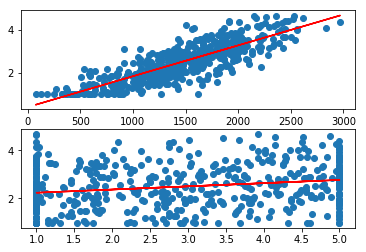

In [30]:
# Vaš kôd ovdje
fig, subplot = plt.subplots(2, 1)

exam_score = np.array([exam_score]).reshape(-1, 1)
grade_in_highschool = np.array([grade_in_highschool]).reshape(-1, 1)

subplot[0].scatter(exam_score, grades_y)
subplot[1].scatter(grade_in_highschool, grades_y)

# poly = PolynomialFeatures(1)
# feat_ex = poly.fit_transform(exam_score)
# feat_high = poly.fit_transform(grade_in_highschool)

model1 = LinearRegression()
model1.fit(exam_score, grades_y)
h1 = model1.predict(exam_score)
subplot[0].plot(exam_score, h1, c='red')

model2 = LinearRegression()
model2.fit(grade_in_highschool, grades_y)
h2 = model2.predict(grade_in_highschool)
subplot[1].plot(grade_in_highschool, h2, c='red')

**b)** Naučite model L2-regularizirane regresije ($\lambda = 0.01$), na podacima `grades_X` i `grades_y`:

In [31]:
# Vaš kôd ovdje
model = Ridge(alpha=0.01)
model.fit(grades_X, grades_y)
print(model.intercept_, model.coef_)

0.15061179575776018 [0.00141497 0.09477276]


Sada ponovite gornji eksperiment, ali prvo skalirajte podatke `grades_X` i `grades_y` i spremite ih u varijable `grades_X_fixed` i `grades_y_fixed`. Za tu svrhu, koristite [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
# Vaš kôd ovdje
scaler = StandardScaler()
grades_X_fixed = scaler.fit_transform(grades_X)
grades_y_fixed = scaler.fit_transform(grades_y.reshape(-1, 1))
model = Ridge(alpha=0.01)
model.fit(grades_X_fixed, grades_y_fixed)
print(model.intercept_, model.coef_)

[8.62551331e-17] [[0.81630375 0.15167761]]


**Q:** Gledajući grafikone iz podzadatka (a), koja značajka bi trebala imati veću magnitudu, odnosno važnost pri predikciji prosjeka na studiju? Odgovaraju li težine Vašoj intuiciji? Objasnite.  

### 8. Multikolinearnost i kondicija matrice

**a)** Izradite skup podataka `grades_X_fixed_colinear` tako što ćete u skupu `grades_X_fixed` iz
zadatka *7b* duplicirati zadnji stupac (ocjenu iz srednje škole). Time smo efektivno uveli savršenu multikolinearnost.

In [34]:
# Vaš kôd ovdje
grades_X_fixed_colinear = np.c_[grades_X_fixed, grades_X_fixed.T[1]]
print(grades_X_fixed_colinear)
print(grades_X_fixed)

[[ 0.95063817 -0.78607869 -0.78607869]
 [-0.50343434 -0.50193004 -0.50193004]
 [ 1.18596832 -0.52213172 -0.52213172]
 ...
 [-0.31593552  0.80074234  0.80074234]
 [ 0.81288393  1.24783236  1.24783236]
 [-0.01938126  1.21729714  1.21729714]]
[[ 9.50638167e-01 -7.86078688e-01]
 [-5.03434341e-01 -5.01930040e-01]
 [ 1.18596832e+00 -5.22131716e-01]
 [-5.01521087e-01  1.00664465e+00]
 [-1.45432123e+00  1.07657545e+00]
 [ 4.55105562e-01  1.37463962e+00]
 [ 1.22805990e+00  3.17053750e-02]
 [ 1.08456590e+00  1.37463962e+00]
 [ 8.89414061e-01  1.10502124e+00]
 [ 7.34440544e-01 -1.64077221e-01]
 [-1.39916214e-01 -1.38407669e+00]
 [-4.24990955e-01  5.53692134e-01]
 [-7.29198230e-01 -9.54244554e-01]
 [ 1.20318760e+00  1.23292343e+00]
 [-1.19603204e+00 -8.08989112e-01]
 [-4.42535488e-02 -7.59295189e-01]
 [-4.02031916e-01  1.37463962e+00]
 [-1.78914056e+00 -1.38407669e+00]
 [-1.69347789e+00 -1.01581550e+00]
 [ 3.26917591e-01 -1.38407669e+00]
 [ 9.67857447e-01  8.85447784e-01]
 [-1.04488502e+00 -7.0992

Ponovno, naučite na ovom skupu L2-regularizirani model regresije ($\lambda = 0.01$).

In [35]:
# Vaš kôd ovdje
model = Ridge(alpha=0.01)
model.fit(grades_X_fixed_colinear, grades_y_fixed)
print(model.intercept_, model.coef_)

[8.6255971e-17] [[0.81630364 0.07583957 0.07583957]]


**Q:** Usporedite iznose težina s onima koje ste dobili u zadatku *7b*. Što se dogodilo?

**b)** Slučajno uzorkujte 50% elemenata iz skupa `grades_X_fixed_colinear` i naučite dva modela L2-regularizirane regresije, jedan s $\lambda=0.01$ i jedan s $\lambda=1000$). Ponovite ovaj pokus 10 puta (svaki put s drugim podskupom od 50% elemenata).  Za svaki model, ispišite dobiveni vektor težina u svih 10 ponavljanja te ispišite standardnu devijaciju vrijednosti svake od težina (ukupno šest standardnih devijacija, svaka dobivena nad 10 vrijednosti).

In [36]:
# Vaš kôd ovdje
n = len(grades_X_fixed_colinear) // 2

weights_1_1 = []
weights_1_2 = []
weights_1_3 = []
weights_2_1 = []
weights_2_2 = []
weights_2_3 = []

for i in range(10):
    indices = np.random.choice(len(grades_X_fixed_colinear), size=n)
    half_grades_X = grades_X_fixed_colinear[indices]
    half_grades_y = grades_y_fixed[indices]
    
    model1 = Ridge(alpha=0.01)
    model1.fit(half_grades_X, half_grades_y)
    print(model1.coef_)
    weights_1_1.append(model1.coef_[0][0])
    weights_1_2.append(model1.coef_[0][1])
    weights_1_3.append(model1.coef_[0][2])
    
    model2 = Ridge(alpha=1000)
    model2.fit(half_grades_X, half_grades_y)
    print(model2.coef_)
    weights_2_1.append(model2.coef_[0][0])
    weights_2_2.append(model2.coef_[0][1])
    weights_2_3.append(model2.coef_[0][2])

print("Std. deviation: lambda=0.01, weight1: ", np.std(weights_1_1))
print("Std. deviation: lambda=0.01, weight2: ", np.std(weights_1_2))
print("Std. deviation: lambda=0.01, weight3: ", np.std(weights_1_3))
print("Std. deviation: lambda=1000, weight1: ", np.std(weights_2_1))
print("Std. deviation: lambda=1000, weight2: ", np.std(weights_2_2))
print("Std. deviation: lambda=1000, weight3: ", np.std(weights_2_3))


[[0.78442614 0.05798842 0.05798842]]
[[0.17042548 0.05277113 0.05277113]]
[[0.84185496 0.10853086 0.10853086]]
[[0.16606135 0.03682682 0.03682682]]
[[0.80028869 0.09258294 0.09258294]]
[[0.16016355 0.02992725 0.02992725]]
[[0.84406406 0.0516362  0.0516362 ]]
[[0.17531914 0.02508137 0.02508137]]
[[0.78971539 0.07886073 0.07886073]]
[[0.16155553 0.03428091 0.03428091]]
[[0.80237957 0.06556442 0.06556442]]
[[0.16091022 0.02379852 0.02379852]]
[[0.84263554 0.06199831 0.06199831]]
[[0.16897212 0.02447929 0.02447929]]
[[0.84846728 0.07953089 0.07953089]]
[[0.15569452 0.04243913 0.04243913]]
[[0.807097   0.08006777 0.08006777]]
[[0.17085732 0.03982161 0.03982161]]
[[0.90488057 0.06472009 0.06472009]]
[[0.15395101 0.01845126 0.01845126]]
Std. deviation: lambda=0.01, weight1:  0.03492743602939158
Std. deviation: lambda=0.01, weight2:  0.016390085868310072
Std. deviation: lambda=0.01, weight3:  0.016390085868851406
Std. deviation: lambda=1000, weight1:  0.006663922112307718
Std. deviation: lambd

**Q:** Kako regularizacija utječe na stabilnost težina?  
**Q:** Jesu li koeficijenti jednakih magnituda kao u prethodnom pokusu? Objasnite zašto.

**c)** Koristeći [`numpy.linalg.cond`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.cond.html) izračunajte kondicijski broj matrice $\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I}$, gdje je $\mathbf{\Phi}$ matrica dizajna (`grades_X_fixed_colinear`). Ponovite i za $\lambda=0.01$ i za $\lambda=10$.


In [37]:
# Vaš kôd ovdje
from numpy import linalg

gram = grades_X_fixed_colinear.T.dot(grades_X_fixed_colinear)
shape = gram.shape[0]

mat1 = gram + 0.01*np.eye(shape)
mat2 = gram + 10*np.eye(shape)

cond1 = linalg.cond(mat1)
cond2 = linalg.cond(mat2)

print(cond1, cond2)

100542.86653456726 101.541866534993


**Q:** Kako regularizacija utječe na kondicijski broj matrice $\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I}$?  